Paquetes necesarios
<ul>
    <li>OpenCV: https://anaconda.org/conda-forge/opencv. Documentation: https://docs.opencv.org/4.x/</li>
    <li>Numpy</li>
    <li>Matplotlib</li>
    <li>Python 3.7</li>
</ul>

### Importar imágenes en OpenCV

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Leer la imagen utilizando la función imread.
img_raw = cv2.imread("mandrill_colour.png")

In [4]:
# Saber el tipo y la forma de la matriz. La imagen es una matriz numpy con una forma de 288×288 y con 3 canales.
print(type(img_raw), img_raw.shape)

<class 'numpy.ndarray'> (288, 288, 3)


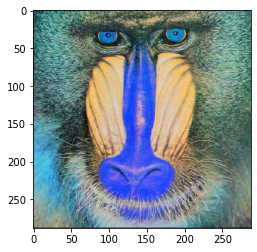

In [5]:
# Ver la imagen
plt.imshow(img_raw)

Lo que obtenemos como resultado es un poco diferente con respecto al color. Esperábamos una imagen de colores brillantes, pero lo que obtenemos es una imagen con cierto matiz azulado.

Eso sucede porque OpenCV y matplotlib tienen diferentes órdenes de colores primarios. Mientras que OpenCV lee imágenes en forma de BGR, matplotlib, por otro lado, sigue el orden RGB.

Por lo tanto, cuando leemos un archivo a través de OpenCV, lo leemos como si contuviera canales en el orden de azul, verde y rojo.

Sin embargo, cuando mostramos la imagen usando matplotlib, el canal rojo y el azul se intercambian y, de ahí, el tinte azul.

Para evitar este problema, transformaremos el canal a la forma en que matplotlib espera que se use la función cvtColor.

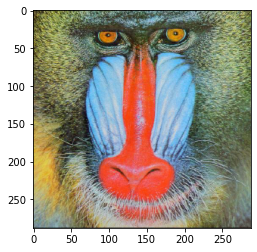

In [6]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [7]:
# Se puede desplegar de esta manera
cv2.imshow("Hay naranjas", img_raw)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Guardar imágenes

In [8]:
# Las imágenes se pueden guardar en el directorio de trabajo de la siguiente manera
cv2.imwrite('final_image.png', img_rgb)

True

### Representación de los diferentes tipos de imágenes

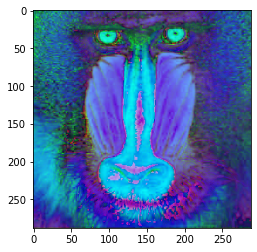

In [9]:
# En Python convertir a BGR a HSV
imagenEnHsv = cv2.cvtColor(img_raw, cv2.COLOR_BGR2HSV)
plt.imshow(imagenEnHsv)

In [10]:
# Intensidad
I = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
print(I)
cv2.imshow("Hay mandril", I)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[144  49 115 ...  68 125 159]
 [ 92  77  73 ... 112 113 112]
 [ 83 118  65 ...  99  78  77]
 ...
 [ 99 128 145 ...  98  92  84]
 [129 141 136 ...  95  89  84]
 [ 80  72  64 ...  45  44  39]]


la función cv2.threshold se usa para el umbral. 
 

    Sintaxis: cv2.threshold(fuente, valor de umbral, valor máximo, técnica de umbral) 
    Parámetros: 
    -> fuente : matriz de imágenes de entrada (debe estar en escala de grises). 
    -> ThresholdValue: valor del umbral por debajo y por encima del cual los valores de píxeles cambiarán en consecuencia. 
    -> maxVal : Valor máximo que se le puede asignar a un píxel. 
    -> ThresholdingTechnique : el tipo de umbralización que se aplicará. 
     


In [11]:
# leer el archivo: Diferentes tipos de banderas 
# https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80
# I = cv2.imread('mandrill_colour.png', cv2.IMREAD_GRAYSCALE)

# definir un umbral, 128 es el medio de blanco y negro en escala de grises
thresh = 128
# asignar canal azul a ceros
img_binary = cv2.threshold(I, thresh, 255, cv2.THRESH_BINARY)[1]

cv2.imshow("Binary", img_binary) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

La técnica básica de Umbralización es la Umbralización Binaria. Para cada píxel, se aplica el mismo valor de umbral. Si el valor del píxel es menor que el umbral, se establece en 0; de lo contrario, se establece en un valor máximo.
Las diferentes Técnicas Simples de Umbralización son: 
 

    cv2.THRESH_BINARY : si la intensidad de píxeles es mayor que el umbral establecido, el valor se establece en 255; de lo contrario, se establece en 0 (negro).
    cv2.THRESH_BINARY_INV : Caso invertido o opuesto de cv2.THRESH_BINARY.
    cv.THRESH_TRUNC : si el valor de intensidad de píxel es mayor que el umbral, se trunca al umbral. Los valores de píxel se establecen para que sean los mismos que el umbral. Todos los demás valores siguen siendo los mismos.
    cv.THRESH_TOZERO : la intensidad de píxeles se establece en 0, para todas las intensidades de píxeles, menos que el valor de umbral.
    cv.THRESH_TOZERO_INV : Caso invertido o opuesto de cv2.THRESH_TOZERO.


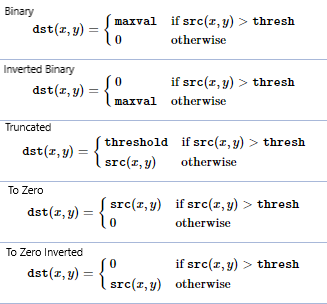

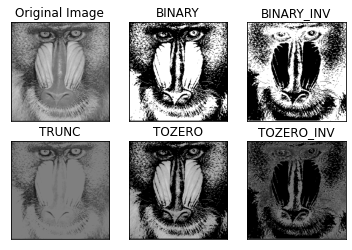

In [12]:
# Diferentes tipos de umbralización

img = cv2.imread('mandrill_colour.png',0)
ret,thresh1 = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

#### Tarea

Del artículo https://revistadigital.inesem.es/informatica-y-tics/opencv/. Realizar la práctica de "Dibujar en imágenes". Obtener en una imagen una línea recta, un rectángulo y un círculo; finalmente escribir texto en la imagen. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Imagen con una Línea Recta

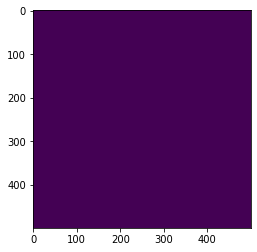

In [3]:
# Definimos el fondo de la imagen
image = np.zeros(shape=(500, 500), dtype=np.int16)

plt.imshow(image)

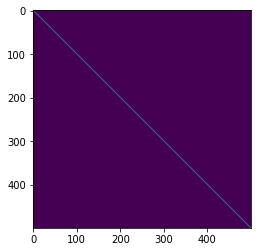

In [10]:
# Definimos el fondo de la imagen
image = np.zeros(shape=(500, 500), dtype=np.int16)
# Dibujemos una línea:
linea = cv2.line(image, (0, 0), (500, 500), 2)

plt.imshow(linea)

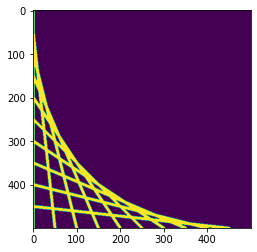

In [81]:
# Definimos el fondo de la imagen
image = np.zeros(shape=(500, 500), dtype=np.int16)
# Dibujemos una línea:
#linea = cv2.line(image, (0, 0), (500, 500), 2)

for x in range(0, 500, 50):
    linea = cv2.line(image, (x, 500), (0, x), (50, 50, 0), 5)
    plt.imshow(linea)

### Rectangulo

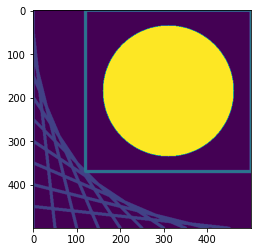

In [86]:
rectan = cv2.rectangle(image, (120, 370), (500, 0), (100, 50, 50), 5)
plt.imshow(rectan)

### Circulo

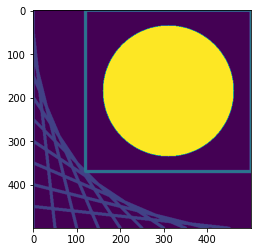

In [101]:
image = cv2.circle(image, (310, 185), 150, (255, 255, 0), -1)
plt.imshow(image)

### Texto

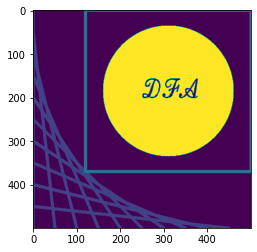

In [102]:
# definimos fuente
font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
# escribimos el texto
text = cv2.putText(image, 'DFA', (250, 200), font, 2, (0, 0, 0), 2, cv2.LINE_AA)
plt.imshow(text)